In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from utils import read_missing
from sklearn.datasets import make_spd_matrix
from sklearn.impute import SimpleImputer, KNNImputer
try:
    from sklearnex import patch_sklearn
    patch_sklearn()
except ModuleNotFoundError as e:
    print(e)

# from exp_max import expectation_max, gaussian_linspace
from exp_max import expectation_max_multi_var, rng, plot_cluster_2d

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [83]:
# means = [[1,1], [7,7], [-2,3]]
# covars = [[[3,2],[2,3]], [[2, -1], [-1, 2]], [[12, -2], [-2, 2]]]
num_clusters = 6
num_dims = 2

covars = np.array([make_spd_matrix(num_dims) for _ in range(num_clusters)])
means = rng.uniform(low=-10, high=10, size=(num_clusters, num_dims))
print(covars.shape)
print(means.shape)
clusters = []
for m, cov in zip(means, covars):
    clusters.append(np.random.multivariate_normal(m, cov, size=(rng.integers(20,1000),)))

d = np.concatenate([c for c in clusters], axis=0)

(6, 2, 2)
(6, 2)


In [84]:
means, variance = expectation_max_multi_var(d, 6, iterations=100)

[[6.62655655e-001 8.29401319e-110 0.00000000e+000 8.20343907e-093
  0.00000000e+000 3.37344345e-001]
 [8.06464422e-001 1.08187572e-100 0.00000000e+000 4.59509184e-085
  0.00000000e+000 1.93535578e-001]
 [9.59212913e-001 4.76549590e-081 0.00000000e+000 2.28960744e-068
  1.46109749e-132 4.07870869e-002]
 ...
 [2.71005839e-005 3.95858106e-099 0.00000000e+000 8.95769070e-086
  1.04643170e-223 9.99972899e-001]
 [4.10151939e-003 3.28147594e-096 0.00000000e+000 3.38528911e-083
  3.10187814e-214 9.95898481e-001]
 [2.64617544e-004 7.09717357e-094 0.00000000e+000 2.35340927e-081
  4.01481697e-170 9.99735382e-001]]


ZeroDivisionError: Weights sum to zero, can't be normalized

In [85]:
plot_cluster_2d(d, means, variance)

ValueError: Dimension mismatch: array 'cov' is of shape (3, 3), but 'mean' is a vector of length 2.

In [ ]:
# assert False

In [86]:
df = read_missing("../Project/missing/MissingData2.txt").T
df

,0,1,2,3,4,5,6,7,8,9,...,748,749,750,751,752,753,754,755,756,757
0,0.688728,NaN,-0.738929,0.245575,0.239510,-0.869971,0.572017,-0.268840,NaN,-0.623860,...,0.233155,0.287330,-0.333830,-0.406076,0.266113,0.147915,-0.449871,NaN,0.240036,-0.344451
1,-0.212720,0.110242,-0.109915,-0.073991,NaN,0.399930,0.340113,0.055739,0.233411,-0.438771,...,0.170940,-0.174583,0.166672,0.093880,0.051021,-0.146270,0.465843,0.278174,0.114697,-0.005629
2,0.498783,-0.219114,-0.584726,-0.317213,0.283365,-0.366042,0.029873,-0.395090,0.418191,-0.388759,...,-0.045587,0.115181,-0.647389,0.030623,-0.000143,0.076802,0.674586,0.005073,NaN,-0.486805
3,0.836527,-0.007928,0.184901,-0.238237,0.047755,-0.624458,0.578126,-0.028300,0.640645,NaN,...,-0.104989,0.400782,-0.737486,0.083542,0.186088,NaN,0.208321,0.780210,0.598281,-0.655308
4,0.753066,-0.126895,-0.124804,-0.234355,0.235801,NaN,0.197955,NaN,0.589923,NaN,...,0.004582,0.135805,NaN,0.093014,0.053536,0.200007,0.208008,0.193115,0.140374,-0.536342
5,-0.212667,0.312428,-0.182223,-0.455127,NaN,-0.154926,0.142759,0.097813,0.196333,-0.167775,...,0.235709,NaN,-0.467100,-0.299350,-0.050622,-0.177462,NaN,0.185872,0.210312,-0.337252
6,0.942724,0.205479,0.106920,-0.326878,NaN,-0.561274,0.919904,0.023466,1.159427,0.064051,...,0.339569,0.777381,-0.509103,-0.033741,0.433304,0.460558,0.584391,1.035979,0.879964,-0.589607
7,-0.452367,0.228858,-0.280529,-0.493662,-0.216095,NaN,0.036152,0.070807,0.053868,-0.573183,...,-0.203926,-0.024358,-0.799801,-0.252667,-0.292689,0.003164,-0.081353,-0.073586,-0.051509,-0.380977
8,-0.077101,NaN,NaN,-0.123100,-0.247166,0.059304,0.486209,0.583128,0.457143,-0.479844,...,0.222074,0.060224,0.037981,0.410436,0.163879,0.393134,0.523234,0.202814,0.498237,0.097221
9,NaN,0.152407,-0.379498,-0.380940,0.167056,-0.471087,0.391493,NaN,0.556191,-0.373068,...,NaN,0.252657,-0.550389,0.223896,0.160713,0.211305,-0.790732,0.412057,0.373390,-0.667712


In [87]:
print("num features with missing", len(df.isna().sum().where(lambda x: x>0).dropna()), "/",len(df.T))
# print("How many missing per feature", *[(i,a) for i,a in pd.DataFrame(df.isna().sum().where(lambda x: x>0).dropna()).itertuples()],sep="\n")

num features with missing 753 / 758


In [88]:
imputer = SimpleImputer().fit(df.values)
imp_df = imputer.transform(df.values)
imp_df
# np.where(imp_df == np.nan)

array([[ 0.68872799, -0.10056565, -0.738929  , ...,  0.26445913,
         0.24003554, -0.34445147],
       [-0.21271986,  0.11024161, -0.10991489, ...,  0.27817391,
         0.11469736, -0.00562868],
       [ 0.49878314, -0.2191136 , -0.58472624, ...,  0.00507326,
         0.27177202, -0.4868051 ],
       ...,
       [ 0.27281525, -0.15204121, -0.21915378, ...,  0.19688787,
         0.41545486, -0.12193684],
       [ 0.24299623, -0.48716497, -0.18041769, ...,  0.16375493,
         0.27177202, -0.32963588],
       [ 0.0446016 , -0.60096978, -0.21915378, ..., -0.4069241 ,
        -0.44735631, -0.32963588]])

In [89]:
print("num features with missing", len(pd.DataFrame(imp_df).isna().sum().where(lambda x: x>0).dropna()), "/",len(df.T))


num features with missing 0 / 758


[0.         0.28652517 0.39963327]


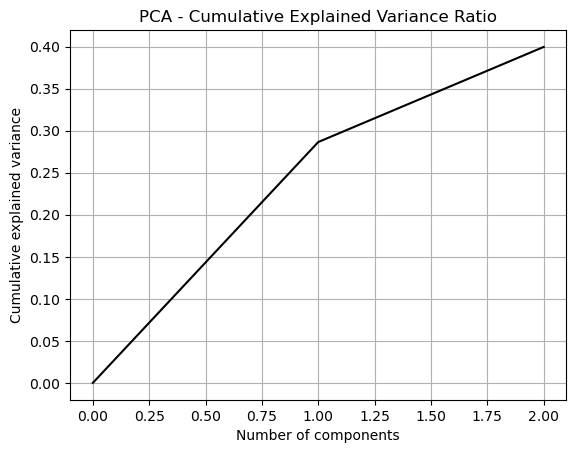

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
# train_test_split

n=2
# do PCA dim reduction to 5
pca = PCA(n_components=n)
pca_evr = pca.fit(scale(imp_df))

pca_evr = (pca.explained_variance_ratio_)



pca_evr = np.concatenate((np.zeros(1), pca_evr))
plt.plot(list(range(n+1)),np.cumsum(pca_evr), color = 'black')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title("PCA - Cumulative Explained Variance Ratio")
plt.grid()
print(np.cumsum(pca_evr))

In [98]:
assert isinstance(imp_df, np.ndarray)
means, variance = expectation_max_multi_var(pca.transform(imp_df), 6, estimate_proportion=True)

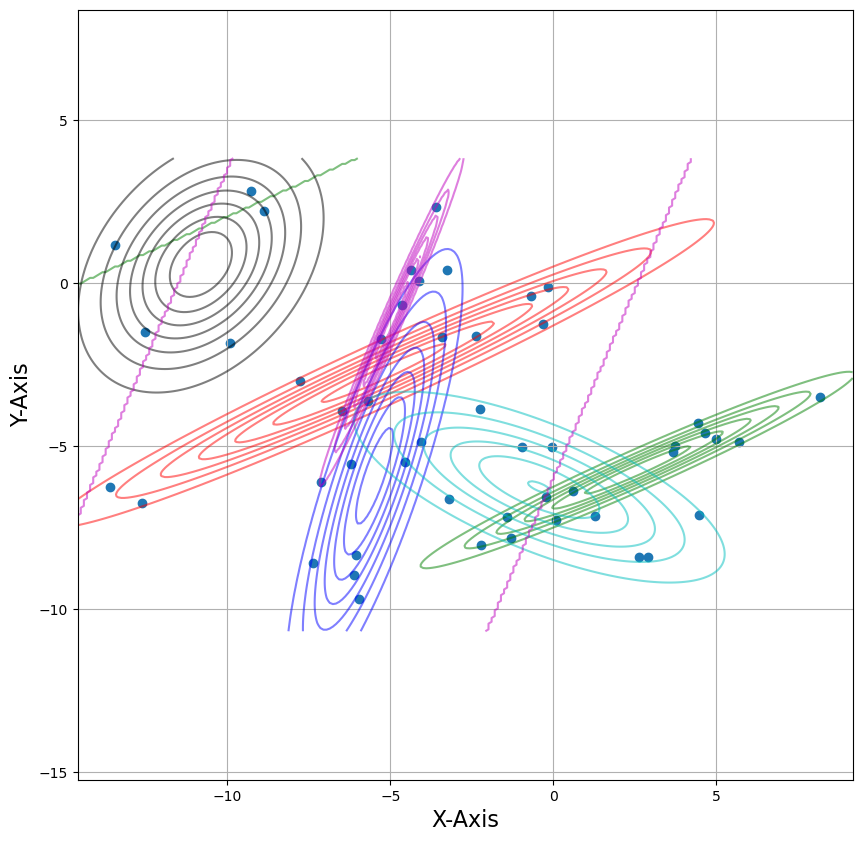

In [100]:
plot_cluster_2d(pca.transform(imp_df), means, variance)

<Axes: >

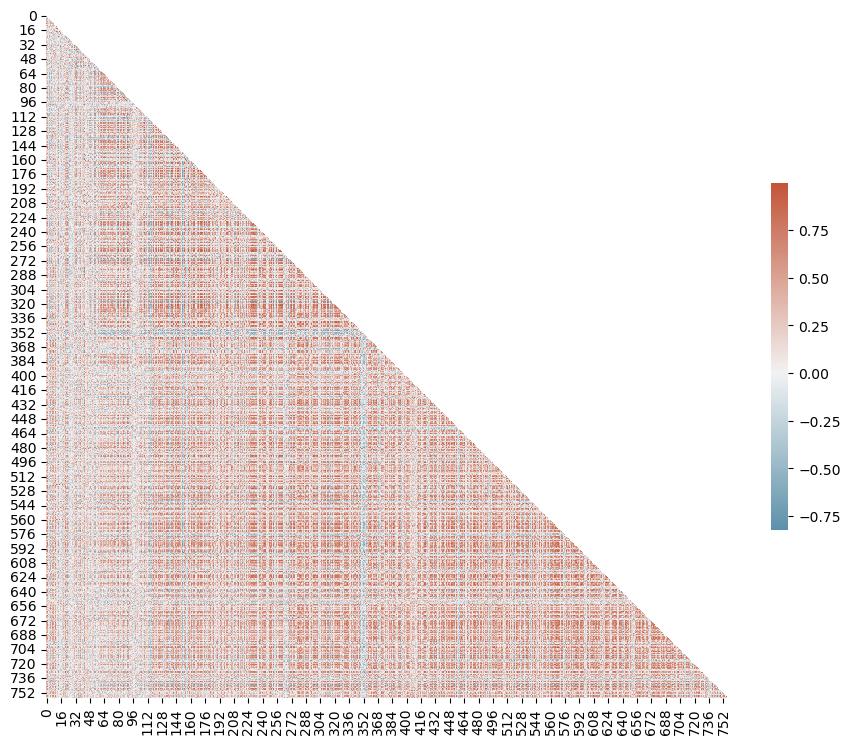

In [93]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, cbar_kws={"shrink": .5})

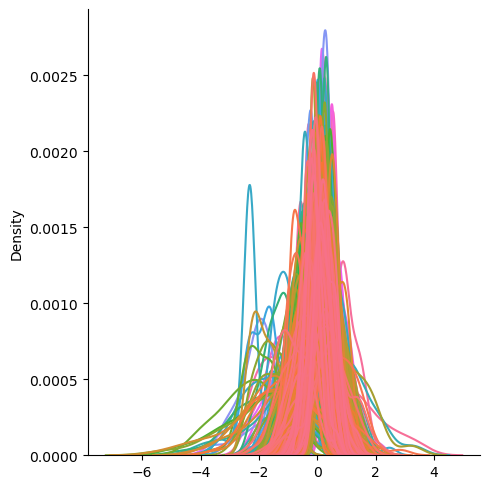

In [94]:
sns.displot(df, kind='kde', legend=False)